# Numpy实现深层神经网络

在该实验中我们将介绍如何使用Python及Numpy lib库实现深层神经网络模型来识别猫。本小节代码与第三章Pyhton版本代码大体一致，区别在于增加了3层隐藏层并设置不同节点数。

** 图片处理 **

由于识别猫问题涉及到图片处理指示，这里对计算机如何保存图片做一个简单的介绍。在计算机中，图片被存储为三个独立的矩阵，分别对应图3-6中的红、绿、蓝三个颜色通道，如果图片是64*64像素的，就会有三个64*64大小的矩阵，要把这些像素值放进一个特征向量中，需要定义一个特征向量X，将三个颜色通道中的所有像素值都列出来。如果图片是64*64大小的，那么特征向量X的总纬度就是64*64*3，也就是12288维。这样一个12288维矩阵就是Logistic回归模型的一个训练数据。

<img src="images/image_to_vector.png" style="width:550px;height:300px;">

## 1 - 引用库

首先，载入几个需要用到的库，它们分别是：
- numpy：一个python的基本库，用于科学计算
- matplotlib.pyplot：用于生成图，在验证模型准确率和展示成本变化趋势时会使用到
- h5py：用于处理hdf5文件数据
- dnn_app_utils_v2：包含了一些有用的工具函数

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import dnn_app_utils_v2

## 2 - 数据预处理

这里简单介绍数据集及其结构。数据集以hdf5文件的形式存储，包含了如下内容：

- 训练数据集：包含了m_train个图片的数据集，数据的标签（Label）分为cat（y=1）和non-cat（y=0）两类。
- 测试数据集：包含了m_test个图片的数据集，数据的标签（Label）同上。

单个图片数据的存储形式为（num_x, num_x, 3），其中num_x表示图片的长或宽（数据集图片的长和宽相同），数字3表示图片的三通道（RGB）。
在代码中使用一行代码来读取数据，读者暂不需要了解数据的读取过程，只需调用load_dataset()方法，并存储五个返回值，以便后续的使用。

In [6]:
train_x_orig, train_y, test_x_orig, test_y, classes = dnn_app_utils_v2.load_data() 
#数据预处理 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

#归一化
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

## 3 - 建立神经网络模型

对比“浅层神经网络”的网络结构，本小节神经网络模型有以下不同：

- 增加2层隐藏层，共有3层隐藏层和1层输出层；

- 第一层设置20个节点，第二层7个，第三层5个；

- 隐藏层激活函数使用Relu激活函数。

在dnn_app_utils_v2文件中已包含下列函数，在实现神经网络模型中将直接调用（下列函数在第四章Python代码部分均有实现，根据网络结构不同略有差异）：

- 初始化参数

initialize_parameters_deep(layer_dims)


- 正向传播

L_model_forward(X, parameters)


- 成本函数

compute_cost(AL, Y)


- 反向传播

L_model_backward(AL, Y, caches)


- 参数更新

update_parameters(parameters, grads, learning_rate)




In [8]:
#设置神经网络规模，5个数字分别表示从输入层到隐藏层到输出层各层节点数
layers_dims = [12288, 20, 7, 5, 1] 
 
#定义函数：L层神经网络模型
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    L层神经网络正向传播: [加权偏移->RELU激活]*(L-1)->加权激活->SIGMOID激活.
    
    参数:
    X -- 输入值，维度为 (样本个数, 像素num_px * num_px * 3)
    Y -- 真实值（0表示不是猫，1表示是猫），维度为 (1, 样本个数)
    layers_dims -- 各层节点数
    learning_rate -- 学习率
    num_iterations -- 训练次数
    print_cost -- 参数设置True，则每100次训练打印一次成本函数值
    
    返回值:
    parameters -- 模型训练所得参数，用于预测
    """

    np.random.seed(1)
    costs = []                                                                

    #参数初始化
    parameters = dnn_app_utils_v2.initialize_parameters_deep(layers_dims)
    
    #训练
    for i in range(0, num_iterations):

        #正向传播: [加权偏移 -> RELU激活]*(L-1) -> 加权偏移后 -> SIGMOID激活       
        AL, caches = dnn_app_utils_v2.L_model_forward(X, parameters)
        
        #计算成本函数
        cost = dnn_app_utils_v2.compute_cost(AL, Y)
    
        #反向传播
        grads = dnn_app_utils_v2.L_model_backward(AL, Y, caches)
 
        #更新参数
        parameters = dnn_app_utils_v2.update_parameters(parameters, grads, learning_rate)
                
        #每100次训练打印一次成本函数
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    #绘制损失函数变化折线图
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


下面开始训练，训练2500次，观察成本函数变化

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


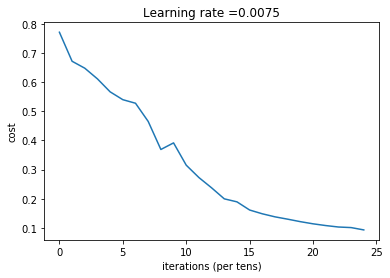

In [9]:
parameters = dnn_app_utils_v2.L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


在训练集和测试集上进行预测，检测模型准确率，训练集和测试集准确率分别为0.986和0.8：


In [ ]:
print(‘Train Accuracy’)
pred_train = predict(train_x, train_y, parameters)
print(‘Test Accuracy’)
pred_test = predict(test_x, test_y, parameters)


从准确率看，相比于第三章的逻辑回归（本章节处理的数据与第三章相同），深层神经网络准确率提高了不少，这是因为深层神经网络提供更多隐藏层，使得神经网络能够拟合更复杂的模型，识别图片准确率更高。
